**Autor**: Paulo Lima<br>
**LinkedIn**: https://linkedin.com/in/dspaulolima

# **Walmart**

![walmart](walmart.jpg)

O Walmart é uma das maiores multinacionais de lojas de departamento. Foi fundada por Sam Walton em 1962, nos Estados Unidos, tendo sido incorporada em 1969 e feita capital aberto na bolsa de Nova Iorque em 1972. Foi considerada, em 2010, a maior loja de varejo do país. Tem sede em Bentonville, Arkansas. A rede gera bilhões de dólares em vendas todo ano. A Walmart também opera a Sam's Club na América do Norte.

Com expansão internacional, o Walmart opera aproximadamente 11.500 lojas sob 56 marcas em 27 países e comércio eletrônico em 10 países. Costuma empregar certa de 2,2 milhões de associados em todo o mundo, sento 1,5 milhão somente nos EUA.

### **Descrição dos Dados**

Aqui estão fornecidos dados históricos de vendas de 45 lojas do Walmart localizado em diferentes regiões. Cada loja contém um número de departamentos, e nós fomos incubidos de prever a quantidade de vendas por departamento por loja.

Além disso, o Walmart realiza vários eventos de descontos promocionais ao longo do ano. Essas reduções precedem feriados importantes, os quatro maiores dos quais são a Liga de Futebol Americano *(Super Bowl)*, Dia do Trabalhador, Ação de Graças e Natal. As semanas que incluem esses feriados são ponderadas cinco vezes mais na avaliação do que nas semanas que não são feriados. Parte do desafio apresentado é modelar os efeitos dos descontos nessas semanas de férias na ausência de dados históricos completos/ideais.

**stores.csv**

Este arquivo contém informações anonimizadas sobre as 45 lojas, indicando o tipo e tamanho da loja.

**train.csv**

Esses são os dados históricos do treinamento, que abrangem desde 05-02-2010 a 01-11-2012. Dentro deste arquivo, encontraremos os seguintes atributos:

``Store`` - identificação da loja<br>
``Dept`` - identificação do departamento<br>
``Date`` - a semana<br>
``Weekly_Sales`` - vendas por departamento por loja<br>
``IsHoliday`` - se a semana é um feriado especial<br>

**test.csv**

Este arquivo é idêntico ao train.csv, exceto a omissão das vendas semanais. A tarefa da parte de modelagem é prever as vendas para cada trio de loja, departamento e data neste arquivo.

**features.csv**

Este arquivo contém dados adicionais relacionados à loja, departamento e atividade regional para as datas especificadas. Ele contém os seguintes atributos:

``Store`` - identificação da loja<br>
``Date`` - a semana<br>
``Temperature`` - a temperatura média na região<br>
``Fuel_Price`` - o custo de combustível na região<br>
``MarkDown1-5`` - dados anonimizados relacionados a descontos promocionais que o Walmart está executando. Os dados de descontos estão disponíveis somente após novembro de 2011 e não estão disponíveis para todas as lojas o tempo todo. Qualquer valor ausente é marcado com um NA.<br>
``CPI`` - o índice de preços ao consumidor<br>
``Unemployment`` - a taxa de desemprego<br>
``IsHoliday`` - se a semana é um feriado especial<br>

Por conveniência, os quatro feriados se enquadram nas semanas seguintes no conjunto de dados *(nem todos os feriados estão nos dados)*:

Liga de Futebol Americano *(Super Bowl)*: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br>
Dia do Trabalhador *(Labor Day)*: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br>
Dia de Ação de Graças *(Thanksgiving)*: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br>
Natal *(Christmas)*: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### **Aquisição dos dados**

O conjunto de dados foi adquirido da plataforma Kaggle.<br>
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

### **Pré-Processamento**

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
%matplotlib inline
sns.set_style('darkgrid')

### Carga e obtenção de informações do conjunto de dados (datasets)

In [103]:
# Carregar datasets

PATH_STORES = 'C:/DataScience/datasets/walmart_sales/stores.csv'
PATH_HISTORIC_DATA = 'C:/DataScience/datasets/walmart_sales/train.csv'
PATH_NEW_DATA = 'C:/DataScience/datasets/walmart_sales/test.csv'
PATH_FEATURES = 'C:/DataScience/datasets/walmart_sales/features.csv'

stores = pd.read_csv(PATH_STORES)
historic_data = pd.read_csv(PATH_HISTORIC_DATA, parse_dates=['Date'])
new_data = pd.read_csv(PATH_NEW_DATA, parse_dates=['Date'])
features = pd.read_csv(PATH_FEATURES, parse_dates=['Date'])

DATA STORES

In [3]:
# Visualição do dataset Stores
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [4]:
# Informações do dataset Stores
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
# Tipos de Stores
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

Neste dataset *(stores)* temos **45 lojas** nas quais estão divididas nos **tipos A, B e C**. Cada loja com seus respectivos tamanhos. Também **não há valores nulos** *(observamos na seção ``Non-Null Count``)*. Temos os tipos de dados **inteiro** em ``Store`` e ``Size`` e **objeto** em ``Type``.

HISTORIC DATA

In [6]:
# Visualição do dataset Train
historic_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [7]:
# Informações do dataset Train
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [8]:
# Quantidade de Dept
len(historic_data.Dept.unique())

81

Aqui temos **421570 entradas**, **sem valores nulos**, e um total de **81 departamentos**. Temos os tipos de dados **inteiro** em ``Store`` e ``Dept``, **datetime** em ``Date``, **flutuante** em ``Weekly_Sales`` e **booleano** em ``IsHolyday``.

DATASET FEATURES

In [11]:
# Visualização do dataset Features
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [12]:
# Informações do dataset Features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


São mostrados os dados relacionados às lojas, aos departamentos e à atividade por região nas datas especificadas. **Há valores missing** em alguns atributos das **8190 entradas** e tipos de dados **inteiro**, **flutuante**, **datetime** e **booleano**.

## Mesclagem dos datasets

Em todos os datasets, os atributos em comum são o ``Store`` e o ``Date``. Vamos mesclar os datasets para um único conjunto com as seguintes etapas:

* Não serão, neste momento, utilizados os dados novos *(new_data);

* Merge entre os datasets 'historic_data' e 'stores' com parâmetro ``how = 'outer'``; (nomeamos 'merge1')

Aqui queremos unir os datasets sem perda de dados. Onde, em um dos datasets, não houver um atributo de outro, será preenchido com NaN (valor nulo) - dessa forma, mais a frente, servirá para a separação em dados de treino e teste para a modelagem de machine learning;

* Merge entre 'merge1' com os datasets 'features' com parâmetro ``how = 'left'``. *(nomeamos 'walmart')*

Nesse faremos a união dos datasets baseados no atributo mais a esquerda (no caso 'merge1'). Serão incorporados os dados de 'features' em 'merge1' *(sem acréscimo ou decréscimo de linhas)*.

In [104]:
# Merge dos datasets 'merge1' e 'stores'
merge1 = pd.merge(historic_data, stores, how='inner', on=['Store'])

# Merge dos datasets 'merge2' e 'features'
walmart = pd.merge(merge1, features, how='inner', on=['Store' ,'Date', 'IsHoliday'])

# Transformar IsHoliday em object
walmart.IsHoliday = walmart.IsHoliday.astype('O')
# Informações do novo dataset
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  object        
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Portanto, após os merges, ficamos com **421570 entradas**; Encontramos vários **missing values** e três tipos de dados *(int, datetime, float e object)*. 

## DataViz - Parte 1/2

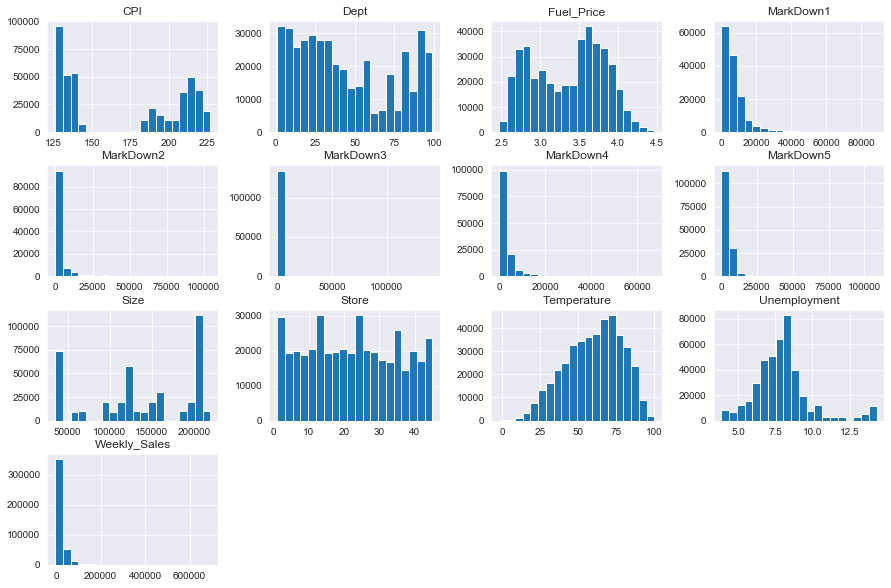

In [88]:
# Histograma
walmart.hist(bins=20, figsize=(15,10))
plt.show()

O histograma acima nos mostra alguns atributos com uma quantidade de valores incomum e distribuições irregulares *(destacando os atributos ``MarkDown1-5``)*. Precisamos analisar melhor cada atributo individualmente.

Vamos imprimir um resumo estatístico com:
* quantidade total de valores não nulos
* quantidade total de valores nulos
* porcentagem de valores nulos
* valores mínimo e máximo
* média e mediana
* tipos de dados

Tal resumo será ordenado de acordo com a porcentagem decrescente de valores nulos.

In [18]:
# Definindo função estatística
def describes(df):
    describes = {}
    describes['non_null'] = df.count()
    describes['null_sum'] = df.isna().sum()
    describes['null_%'] = round(df.isna().mean()*100, 2)
    describes['mean'] = round(df.mean(),2)
    describes['min'] = round(df.min(),2)
    describes['25%'] = round(df.quantile(q=.25),2)
    describes['median'] = round(df.median(),2)
    describes['75%'] = round(df.quantile(q=.75),2)
    describes['max'] = round(df.max(),2)
    describes['dtypes'] = df.dtypes
    
    return pd.DataFrame(describes).sort_values(by='null_%', ascending=False)

# Selecionando atributos
cols_walmart = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 
                'MarkDown1', 'MarkDown2', 'MarkDown3',
                'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Estatística do dataset dos atributos selecionados
describes(walmart[cols_walmart])

,non_null,null_sum,null_%,mean,min,25%,median,75%,max,dtypes
MarkDown2,111248,310322,73.61,3334.63,-265.76,41.60,192.00,1926.94,104519.54,float64
MarkDown4,134967,286603,67.98,3383.17,0.22,504.22,1481.31,3595.04,67474.85,float64
MarkDown3,137091,284479,67.48,1439.42,-29.10,5.08,24.60,103.99,141630.61,float64
MarkDown1,150681,270889,64.26,7246.42,0.27,2240.27,5347.45,9210.90,88646.76,float64
MarkDown5,151432,270138,64.08,4628.98,135.16,1878.44,3359.45,5563.80,108519.28,float64
Weekly_Sales,421570,0,0.00,15981.26,-4988.94,2079.65,7612.03,20205.85,693099.36,float64
Size,421570,0,0.00,136727.92,34875.00,93638.00,140167.00,202505.00,219622.00,int64
Temperature,421570,0,0.00,60.09,-2.06,46.68,62.09,74.28,100.14,float64
Fuel_Price,421570,0,0.00,3.36,2.47,2.93,3.45,3.74,4.47,float64
CPI,421570,0,0.00,171.20,126.06,132.02,182.32,212.42,227.23,float64


A partir da tabela acima, podemos notar que existem diversos atributos com valores nulos, sendo o maior porcentagem o atributo ``MarkDown2`` com **73.61%**. Vamos verificar gráficos de dispersão dos atributos por tipo de loja em relação à quantidade de vendas.

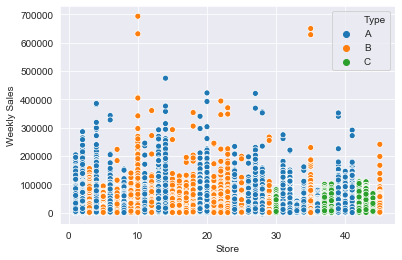

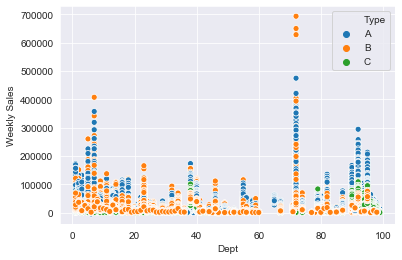

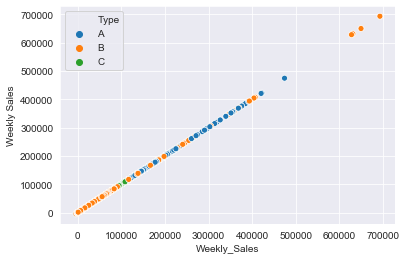

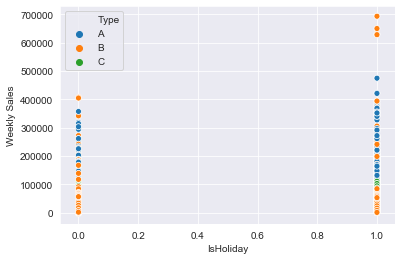

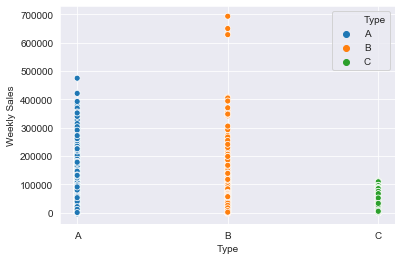

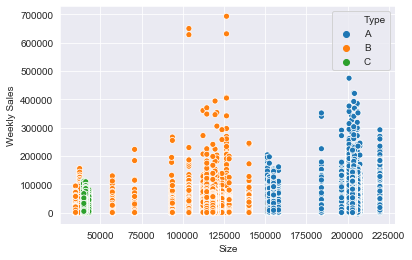

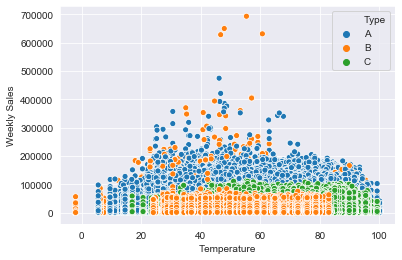

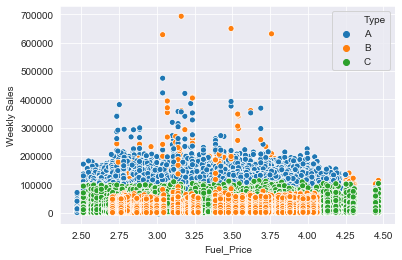

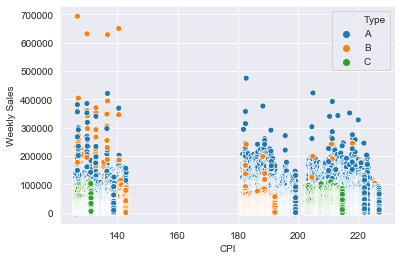

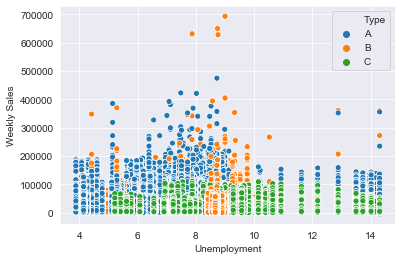

In [19]:
cols_select_walmart = walmart[['Store', 'Dept', 'Weekly_Sales', 
                                     'IsHoliday', 'Type', 'Size','Temperature', 
                                     'Fuel_Price', 'CPI', 'Unemployment']]

for col in cols_select_walmart:
    plt.figure()
    sns.scatterplot(walmart[col] , walmart['Weekly_Sales'], hue=walmart['Type'])
    plt.ylabel('Weekly Sales')
    plt.xlabel(col)

## Missing Values

Missing Values *(NaN)* são valores nulos, faltantes. Já vimos anteriormente que existem valores NaN em alguns atributos do dataset.

Vamos verificar novamente a porcentagem de NaN de cada atributo.

In [20]:
round(walmart.isna().mean().sort_values(ascending=False)*100,2)

MarkDown2       73.61
MarkDown4       67.98
MarkDown3       67.48
MarkDown1       64.26
MarkDown5       64.08
Unemployment     0.00
CPI              0.00
Fuel_Price       0.00
Temperature      0.00
Size             0.00
Type             0.00
IsHoliday        0.00
Weekly_Sales     0.00
Date             0.00
Dept             0.00
Store            0.00
dtype: float64

Como a descrição do atributos ``MarkDown1-5`` diz, não existem registro de descontos promocionais até antes de Novembro 2011.

* Vamos atribuir ZERO para os ``MarkDowns``.
* Vamos atribuir ZERO para ``Weekly_Sales`` negativos.

In [105]:
# Substituir NaN de alguns atributos por ZERO

markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

walmart[markdowns] = walmart[markdowns].fillna(0)

# Substituir valores negativos de Sales por ZERO

walmart['Weekly_Sales'] = walmart['Weekly_Sales'].map(lambda x: 0 if x < 0 else x)

# Verificar quantidade de NaN no dataset

walmart.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

Pronto. Agora não existem valores NaN.

## Outliers

Como observamos na plotagem dos scatterplots mais acima, existem alguns pontos que vão muito além dos valores dos outros pontos. Vejamos:

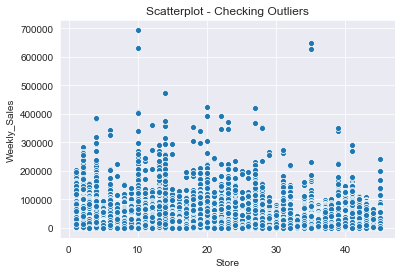

In [94]:
sns.scatterplot(x='Store', y='Weekly_Sales', data=walmart)
plt.title('Scatterplot - Checking Outliers')
plt.show()

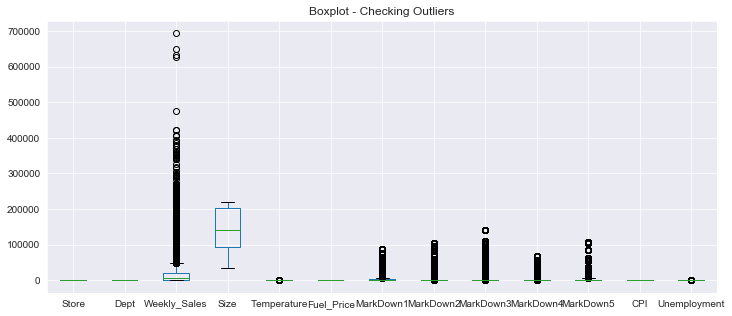

In [95]:
walmart.boxplot(figsize=(12,5))
plt.title('Boxplot - Checking Outliers')
plt.show()

Se observarmos os ``MarkDowns``, os valores considerados outliers são praticamente todos os valores registrados. Esse tanto de outliers se deve ao fato do grande número de valores ZERO. Este foi definido por encontrarmos valores NaN. Então é natural haver esse ruído. Não iremos mexer neles.

Em ``Weekly_Sales`` é natural haver ruídos nas vendas por conta de feriados, por exemplo. Porém vamos excluir aqueles valores que estão acima de $500.000 pois eles se destacam mais que o restante dos valores. Vamos verificar quantos são e, então, fazer o corte. Não mexeremos com ``Temperature`` e ``Unemployment``.

In [96]:
# Imprimindo dataset com valores de vendas acima de $ 500.000
super_sales = walmart[walmart.Weekly_Sales >= 500000]
super_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
90645,10,72,2010-11-26,693099.36,True,B,126512,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003
94393,10,72,2011-11-25,630999.19,True,B,126512,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874
333594,35,72,2010-11-26,627962.93,True,B,103681,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763
337053,35,72,2011-11-25,649770.18,True,B,103681,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745


Existe uma observação interessante. Notamos que essas datas são feriado (semana do Dia de Ação de Graças). Cremos ser normal haver esse pico de vendas, mas mesmo assim os eliminaremos.

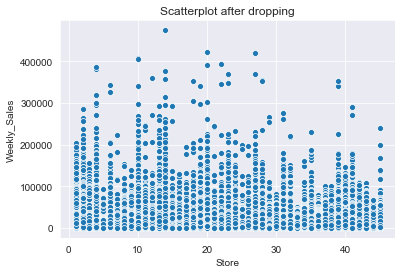

In [97]:
# Drop (selecionando parte do dataset abaixo de 500000)
walmart = walmart[walmart.Weekly_Sales < 500000]

# Scatterplot
sns.scatterplot(x='Store', y='Weekly_Sales', data=walmart)
plt.title('Scatterplot after dropping')
plt.show()

## Manipulação

#### Alterando tipos de dados

In [106]:
walmart.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday               object
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

Temos três atributos não numéricos. Uma data (``Date``), um booleano (``IsHoliday``) e um objeto (``Type``). Então vamos:

* Separar ``Date`` em dia, mês e ano;
* Transformar ``IsHoliday`` em valores 0 (False) e 1 (True);
* Aplicar get_dummies em ``Type``, que converte dados categóricos em valores dummy/indicadores.

A ideia do get_dummies é criar novos atributos, cada um com um tipo de loja, com valores 0 e 1. Quando a loja for do tipo A, mostrará o valor 1 para o atributo ``Type_A`` e 0 para os atributos ``Type_B`` e ``Type_C``. E assim por diante.

In [108]:
# Criar atributos 'Day', 'Month' e 'Year' a partir do 'Date'
walmart['Day'] = walmart.Date.dt.day
walmart['Month'] = walmart.Date.dt.month
walmart['Year'] = walmart.Date.dt.year

# Transformando 'IsHoliday'
IS_HOLIDAY = lambda x: 1 if (x == True) else 0
walmart['IsHoliday'] = walmart.IsHoliday.map(IS_HOLIDAY)

# # Get_Dummies em 'Type'

walmart['Store_Type'] = walmart.Type
walmart = pd.get_dummies(walmart, columns=['Type'])

In [109]:
cols_walmart2 = ['Weekly_Sales', 'IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Type_A', 'Type_B', 'Type_C']

describes(walmart[cols_walmart2]).sort_values(by='mean')

,non_null,null_sum,null_%,mean,min,25%,median,75%,max,dtypes
IsHoliday,421570,0,0.0,0.07,0.00,0.00,0.00,0.00,1.00,int64
Type_C,421570,0,0.0,0.10,0.00,0.00,0.00,0.00,1.00,uint8
Type_B,421570,0,0.0,0.39,0.00,0.00,0.00,1.00,1.00,uint8
Type_A,421570,0,0.0,0.51,0.00,0.00,1.00,1.00,1.00,uint8
Fuel_Price,421570,0,0.0,3.36,2.47,2.93,3.45,3.74,4.47,float64
Month,421570,0,0.0,6.45,1.00,4.00,6.00,9.00,12.00,int64
Unemployment,421570,0,0.0,7.96,3.88,6.89,7.87,8.57,14.31,float64
Day,421570,0,0.0,15.67,1.00,8.00,16.00,23.00,31.00,int64
Temperature,421570,0,0.0,60.09,-2.06,46.68,62.09,74.28,100.14,float64
CPI,421570,0,0.0,171.20,126.06,132.02,182.32,212.42,227.23,float64


## DataViz - Parte 2/2

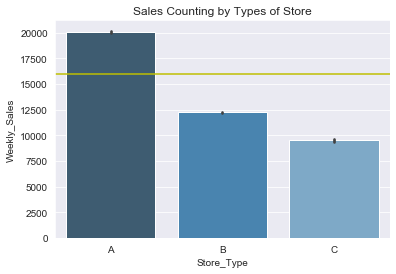

In [110]:
sns.barplot(walmart.Store_Type, walmart.Weekly_Sales, palette='Blues_d')
plt.title('Sales Counting by Types of Store')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.show()

Aqui podemos ver que as lojas do **Tipo A** possui a maior quantidade de vendas *(e acima da média - linha amarela)* e a do **Tipo C**, a menor.

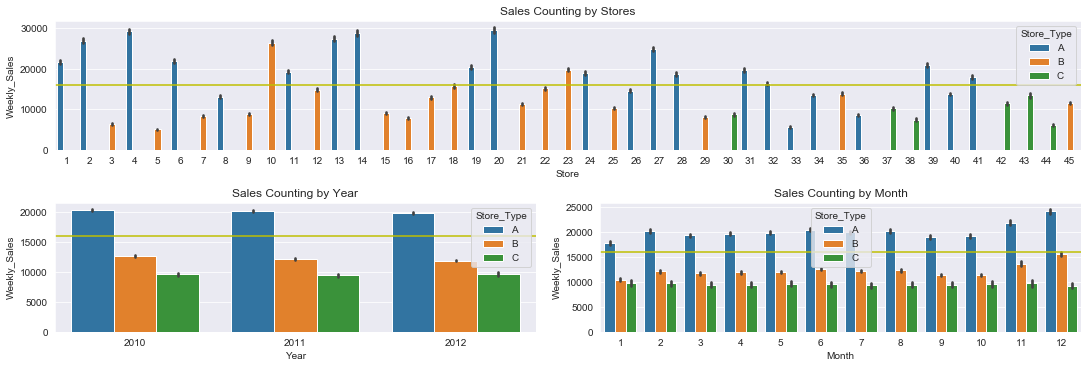

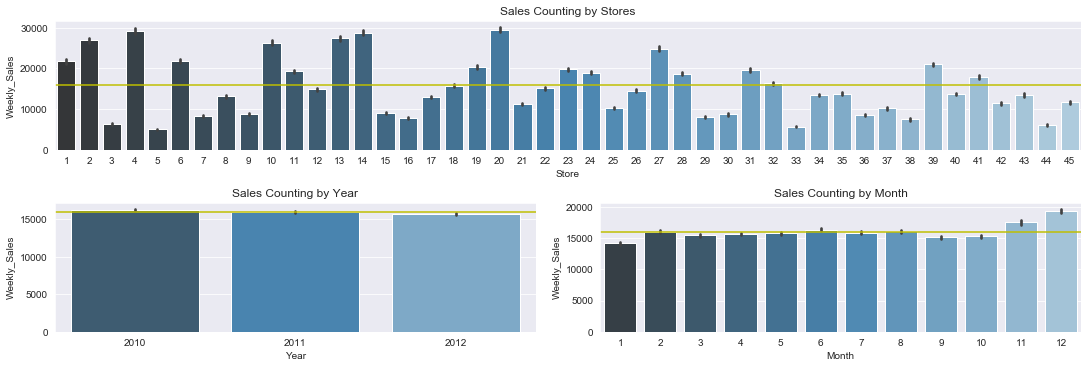

In [111]:
# Configuração
fig3 = plt.figure(constrained_layout=True, figsize=(15,5))
gs = fig3.add_gridspec(2, 2)

# Contagem de vendas por lojas por tipo de loja
f3_ax1 = fig3.add_subplot(gs[0, :])
sns.barplot(x='Store', y='Weekly_Sales', hue='Store_Type', data=walmart)
plt.title('Sales Counting by Stores')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')

# Contagem de vendas por ano por tipo de loja
f3_ax2 = fig3.add_subplot(gs[1, :-1])
sns.barplot(x='Year', y='Weekly_Sales', hue='Store_Type', data=walmart)
plt.title('Sales Counting by Year')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')

# Contagem de vendas por mês por tipo de loja
f3_ax3 = fig3.add_subplot(gs[1:, -1])
sns.barplot(x='Month', y='Weekly_Sales', hue='Store_Type', data=walmart)
plt.title('Sales Counting by Month')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.show()

#############
# Configuração
fig2 = plt.figure(constrained_layout=True, figsize=(15,5))
gs = fig2.add_gridspec(2, 2)

# Contagem de vendas por lojas por tipo de loja
f2_ax1 = fig2.add_subplot(gs[0, :])
sns.barplot(x='Store', y='Weekly_Sales', palette='Blues_d', data=walmart)
plt.title('Sales Counting by Stores')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')

# Contagem de vendas por ano por tipo de loja
f2_ax2 = fig2.add_subplot(gs[1, :-1])
sns.barplot(x='Year', y='Weekly_Sales', palette='Blues_d', data=walmart)
plt.title('Sales Counting by Year')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')

# Contagem de vendas por mês por tipo de loja
f2_ax3 = fig2.add_subplot(gs[1:, -1])
sns.barplot(x='Month', y='Weekly_Sales', palette='Blues_d', data=walmart)
plt.title('Sales Counting by Month')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.show()

* Das 45 lojas, 18 conseguiram ultrapassar a média de vendas;
* Durante os três anos mostrados, as vendas praticamente se mantiveram;
* Em todos esses gráficos, notamos que a maioria das lojas do tipo A sempre ultrapassam a média de vendas dos três anos, sendo as maiores vendas *(acima da média)* realizadas em Novembro e Dezembro.

Como será que foram as vendas durante os feriados das datas especiais?

In [112]:
# Filtro das datas especiais

super_bowl = walmart[(walmart.Date == '2010-02-10') |
                                       (walmart.Date == '2011-02-11') |
                                       (walmart.Date == '2012-02-12')]

labor_day = walmart[(walmart.Date == '2010-09-10') |
                                       (walmart.Date == '2011-09-09') |
                                       (walmart.Date == '2012-09-07')]

thanksgiving = walmart[(walmart.Date == '2010-11-26') |
                                       (walmart.Date == '2011-11-25') |
                                       (walmart.Date == '2012-11-23')]

christmas = walmart[(walmart.Date == '2010-12-31') |
                                       (walmart.Date == '2011-12-30') |
                                       (walmart.Date == '2012-12-28')]

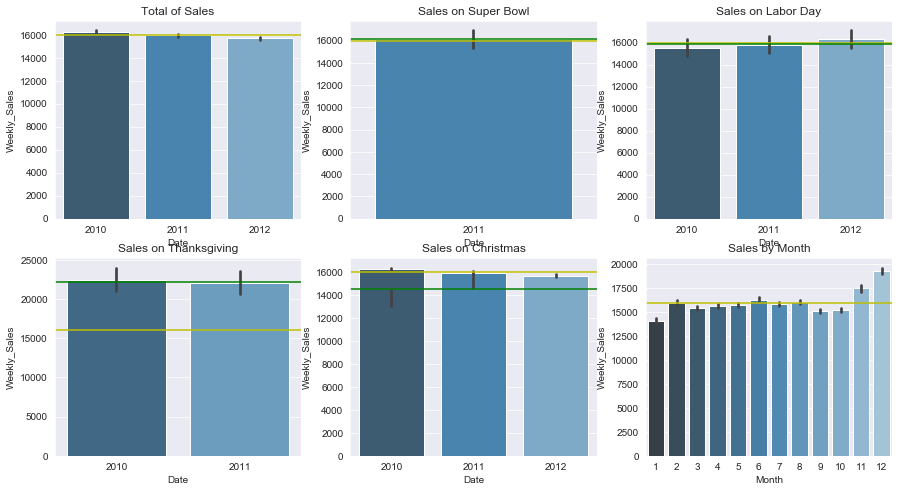

Walmart Total Sales Mean: 15981
Walmart Super Bowl Sales Mean: 16112
Walmart Labor Day Sales Mean: 15882
Walmart Thanksgiving Sales Mean: 22221
Walmart Christmas Sales Mean: 14544


In [114]:
# Plotagem de vendas por datas especiais

# Configuração

f = plt.figure(figsize=(15,8))
gs = f.add_gridspec(2,3)

# Todos os registros

ax = f.add_subplot(gs[0,0])
sns.barplot(walmart.Date.dt.year, walmart.Weekly_Sales, palette='Blues_d')
plt.title('Total of Sales')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')

# Super Bowl

ax = f.add_subplot(gs[0,1])
sns.barplot(super_bowl.Date.dt.year, super_bowl.Weekly_Sales, palette='Blues_d')
plt.title('Sales on Super Bowl')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.axhline(super_bowl.Weekly_Sales.mean(), c='g')

# Labor Day

ax = f.add_subplot(gs[0,2])
sns.barplot(labor_day.Date.dt.year, labor_day.Weekly_Sales, palette='Blues_d')
plt.title('Sales on Labor Day')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.axhline(labor_day.Weekly_Sales.mean(), c='g')

# Thanksgiving

ax = f.add_subplot(gs[1,0])
sns.barplot(thanksgiving.Date.dt.year, thanksgiving.Weekly_Sales, palette='Blues_d')
plt.title('Sales on Thanksgiving')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.axhline(thanksgiving.Weekly_Sales.mean(), c='g')
    
# Christmas

ax = f.add_subplot(gs[1,1])
sns.barplot(christmas.Date.dt.year, christmas.Weekly_Sales, palette='Blues_d')
sns.barplot(walmart.Date.dt.year, walmart.Weekly_Sales, palette='Blues_d')
plt.title('Sales on Christmas')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.axhline(christmas.Weekly_Sales.mean(), c='g')

ax = f.add_subplot(gs[1,2])
sns.barplot(walmart.Month, walmart.Weekly_Sales, palette='Blues_d')
plt.title('Sales by Month')
plt.axhline(walmart.Weekly_Sales.mean(), c='y')
plt.show()

# Médias

print('Walmart Total Sales Mean:', round(walmart.Weekly_Sales.mean()))
print('Walmart Super Bowl Sales Mean:', round(super_bowl.Weekly_Sales.mean()))
print('Walmart Labor Day Sales Mean:', round(labor_day.Weekly_Sales.mean()))
print('Walmart Thanksgiving Sales Mean:', round(thanksgiving.Weekly_Sales.mean()))
print('Walmart Christmas Sales Mean:', round(christmas.Weekly_Sales.mean()))

Nos gráficos acima, a linha **amarela** é a média englobando os anos de 2010 a 2012. A linha **verde** é a média nos feriados individuais.

* Entre 2010 e 2012 as quantidades de vendas se aproximaram da média. Não houve registro de vendas no Super Bowl nos anos de 2010 e 2012, porém em 2011 houve um total de vendas similar à média entre 2010 e 2012;
* No Labor Day houve crescimento de vendas a cada ano, mas as médias anuais e nesse feriado são equivalentes;
* As vendas (e a média) no Thanksgiving ultrapassam a média total e são, praticamente, constantes;
* As vendas (e a média) no Christmans têm diminuído ao longo dos três anos, porém com média superior à média total.
* O maior movimento de vendas gira em torno de Novembro e Dezembro, tendo sua menor ocorrência em Janeiro.

Unemployment Min Rate 3.68 %
Unemployment Max Rate 14.31 %


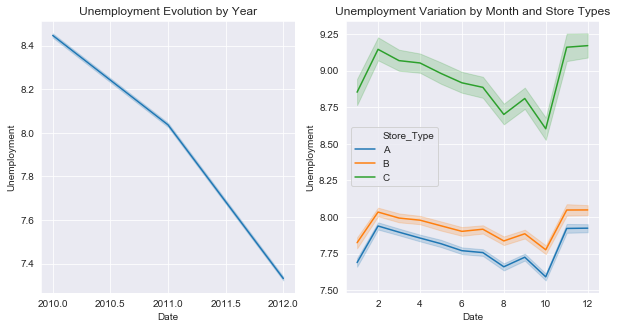

In [51]:
# Configuração

f2 = plt.figure(figsize=(10,5))
gs2 = f2.add_gridspec(1,2)

# Linha de evolução da taxa de desemprego por ano
ax2 = f2.add_subplot(gs2[0,0])
sns.lineplot(walmart.Date.dt.year, walmart.Unemployment)
plt.title('Unemployment Evolution by Year')

# Linda de variação do desemprego por mês
ax2 = f2.add_subplot(gs2[0,1])
sns.lineplot(walmart.Date.dt.month, walmart.Unemployment,
               hue=walmart.Store_Type)
plt.title('Unemployment Variation by Month and Store Types')

print('Unemployment Min Rate', round(features.Unemployment.min(),2),'%')
print('Unemployment Max Rate', round(features.Unemployment.max(),2),'%')

* A taxa de desemprego vai caindo ao logo do ano, indo de **14.31%** a **3.68%**;
* Existe uma variação de desemprego quando se analisa por mês e tipo de loja nos quatro anos, sendo a maior taxa em setembro e a menor em maio.

Podemos aqui deletar o atributo ``Store_Type`` pois ele foi utilizado apenas para gerar os gráficos acima de forma mais interessante. E ``Date`` pois já temos os dados separados em dia, mês e ano.

In [115]:
walmart.drop(columns=['Store_Type', 'Date'], inplace=True)

# Reorganizar Dataset
walmart = walmart[['Store', 'Dept','Type_A',
       'Type_B', 'Type_C','Day', 'Month', 'Year', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales' ]]

walmart.head(2)

,Store,Dept,Type_A,Type_B,Type_C,Day,Month,Year,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,1,0,0,5,2,2010,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,2,1,0,0,5,2,2010,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27


In [2]:
# walmart.to_csv('C:/DataScience/datasets/walmart_sales/df2.csv', index=0)
# walmart = pd.read_csv('C:/DataScience/datasets/walmart_sales/df2.csv')

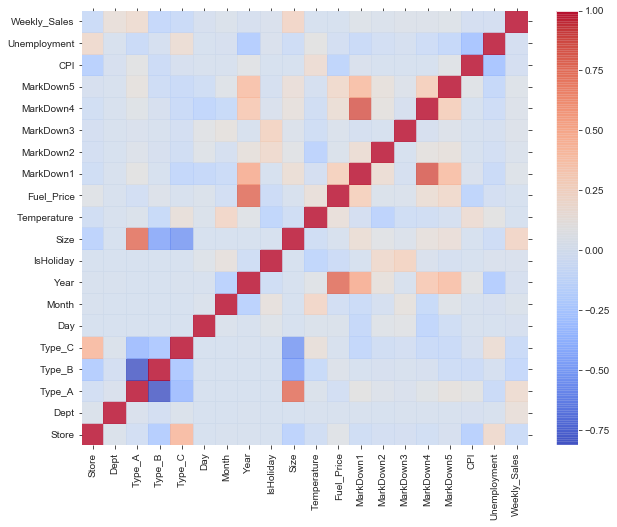

In [117]:
# CORRELACAO

variables = walmart.columns

def visualize_correlation_matrix(data, hurdle = 0.0):
    plt.figure(figsize=(10,8))
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(walmart)

# **MODELAGEM**
```
ATT: em ajuste
Última atualização: 24.março.2020
```

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [121]:
walmart.head(2)

,Store,Dept,Type_A,Type_B,Type_C,Day,Month,Year,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,1,0,0,5,2,2010,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,2,1,0,0,5,2,2010,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27


## Divisão Treino-Teste

In [122]:
# Separando variaveis dependente e inpendente
X = walmart.drop(columns='Weekly_Sales', axis=1)
y = walmart.Weekly_Sales

In [123]:
# Train / Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Scaler

In [124]:
# Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# from sklearn.preprocessing import MinMaxScaler

# mmx = MinMaxScaler()
# X_train = mmx.fit_transform(X_train)
# X_test = mmx.transform(X_test)

#### DECISION TREE MODEL

In [125]:
# Decision Tree Model
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
predict = dtree.predict(X_test)

In [126]:
# Mean Square Error
mse = np.mean((predict - y_test)**2)
np.sqrt(mse)

5504.15073714809

In [127]:
# R Square
r2_dtree = r2_score(y_test, predict)
print(f'O modelo Decision Tree nos mostra que {r2_dtree*100:.2f}% das variáveis independentes conseguem explicar a variável dependente')

O modelo Decision Tree nos mostra que 94.24% das variáveis independentes conseguem explicar a variável dependente


#### RANDOM FOREST

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
rf_pred = rf.predict(X_test)

In [149]:
rf_pred

array([21312.3701,  7288.3609,  4710.3878, ...,    42.0082, 12100.6126,
       11434.2933])

In [150]:
# R Square
r2_rf = r2_score(y_test, rf_pred)
print(f'O modelo Random Forest nos mostra que {r2_rf*100:.2f}% das variáveis independentes conseguem explicar a variável dependente')

O modelo Random Forest nos mostra que 97.12% das variáveis independentes conseguem explicar a variável dependente


## **Tratando Novos Dados**

NEW DATA

In [128]:
# Visualização do dataset Test
new_data.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [129]:
# Informações do dataset Test
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


São **115064 entradas**, sem valores nulos, e com os mesmos tipos de dados **int**, **datetime** e **bool**.

In [130]:
new_data.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [131]:
# Merge dos datasets 'test' e 'stores'
merge2 = pd.merge(new_data, stores, how='left')

# Merge dos datasets 'merge_test' e 'features'
walmart_new = pd.merge(merge2, features, how='left')

# Transformar IsHoliday em object
walmart_new.IsHoliday = walmart_new.IsHoliday.astype('O')

# Missing Values
CPI_median = walmart_new.CPI.median()
walmart_new.CPI = walmart_new.CPI.fillna(value=CPI_median)

walmart_new.fillna(0, inplace=True)

# Criar atributos 'Day', 'Month' e 'Year' a partir do 'Date'
walmart_new['Day'] = walmart_new.Date.dt.day
walmart_new['Month'] = walmart_new.Date.dt.month
walmart_new['Year'] = walmart_new.Date.dt.year

# Transformando 'IsHoliday'
IS_HOLIDAY = lambda x: 1 if (x == True) else 0
walmart_new['IsHoliday'] = walmart_new.IsHoliday.map(IS_HOLIDAY)

# Get_Dummies em 'Type'
walmart_new = pd.get_dummies(walmart_new, columns=['Type'])

# Drop Date
walmart_new.drop(columns='Date', inplace=True)

# Reorganizar Dataset
test_walmart = walmart_new[['Store', 'Dept','Type_A',
       'Type_B', 'Type_C','Day', 'Month', 'Year', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]

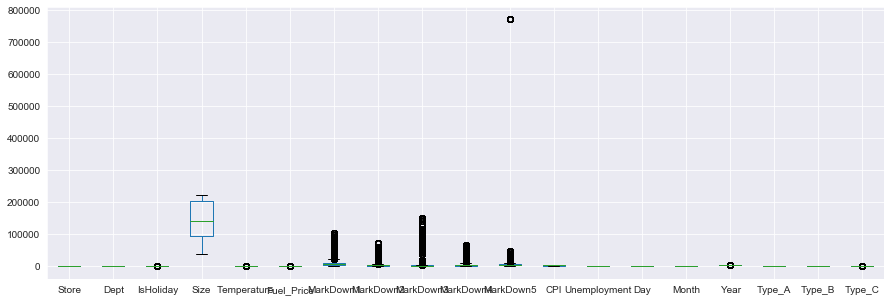

In [132]:
walmart_new.boxplot(figsize=(15,5))
plt.show()

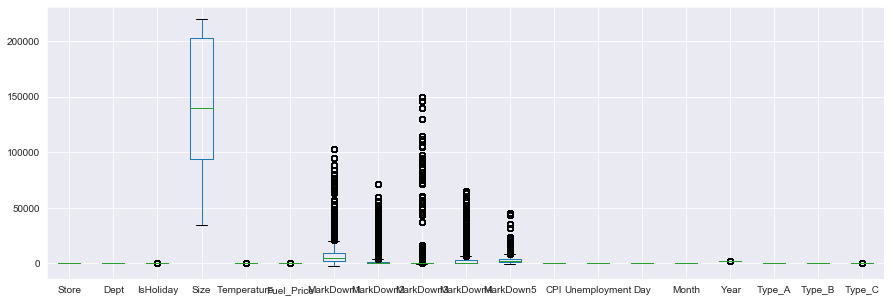

In [133]:
walmart_new = walmart_new[walmart_new.MarkDown5 < 200000]
walmart_new.boxplot(figsize=(15,5))
plt.show()

In [137]:
walmart_new.to_csv('C:/DataScience/datasets/walmart_sales/X_test.csv', index=0)
new_data = pd.read_csv('C:/DataScience/datasets/walmart_sales/X_test.csv')

## Prevendo vendas de novos dados

In [138]:
# Scaler
X_test_new = sc.transform(new_data)

# Predict
predict2 = dtree.predict(X_test_new)
predict2 = pd.DataFrame(predict2, columns=['Sales_Prediction'])

# Dataframe
new_predictions = new_data.join(predict2)
new_predictions.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,Type_A,Type_B,Type_C,Sales_Prediction
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2,11,2012,1,0,0,5111.38
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,9,11,2012,1,0,0,5111.38
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,16,11,2012,1,0,0,5111.38
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,23,11,2012,1,0,0,988.94
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,30,11,2012,1,0,0,5111.38


É isso. 

Por favor, entre em contato caso precise de alguma atualização, correção, sugestões, críticas ou só conversar!

**Paulo Lima**<br>
LinkedIn https://linkedin.com/in/dspaulolima<br> 